In [1]:
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def generate_sine_wave(freq, amp=1, n_samples=16_000, sampling_rate=16_000):
  x = np.arange(n_samples)
  y = amp*np.sin(2 * np.pi * freq * x / sampling_rate)
  return x, y

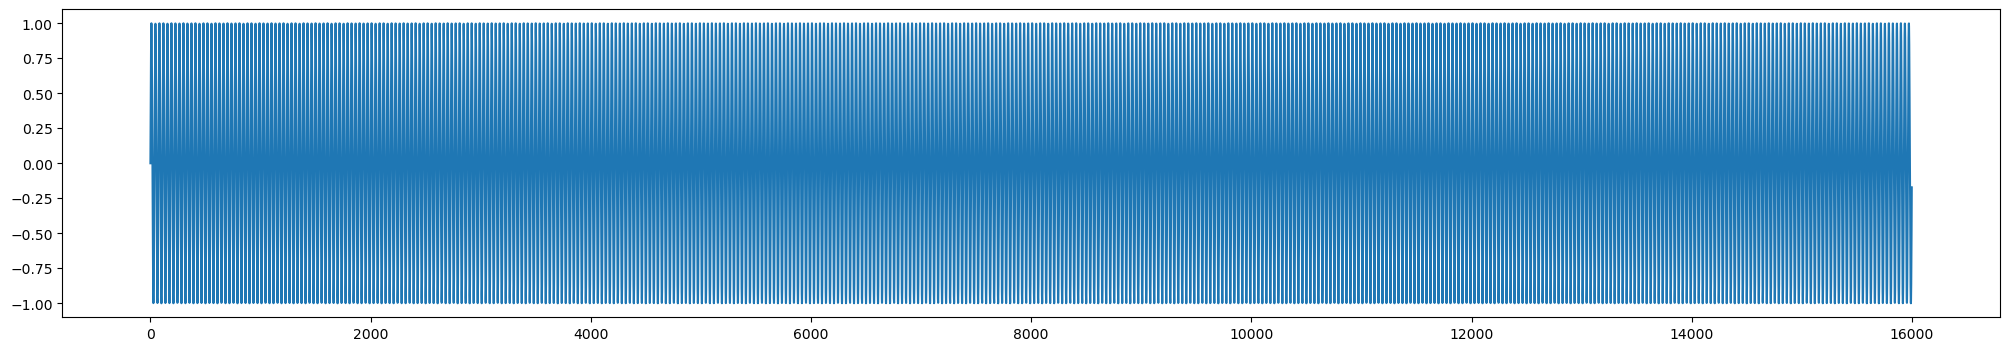

In [3]:
sine_440hz_x, sine_440hz_y = generate_sine_wave(440)

plt.figure(figsize=(25,4))
plt.plot(sine_440hz_x, sine_440hz_y)

ipd.Audio(sine_440hz_y, rate=16_000)

In [4]:
def linear_decay(x, y):
    n_samples = len(x)
    new_y = []
    for i in range(n_samples):
        new_y.append(y[i] * (n_samples - i) / n_samples)
    return x, new_y

In [5]:
def exponential_decay(x, y, rate=1e-2):
    n_samples = len(x)
    new_y = [y[0]]
    for i in range(1, n_samples):
        new_y.append(y[i] * (rate) ** (i / n_samples))
    return x, new_y

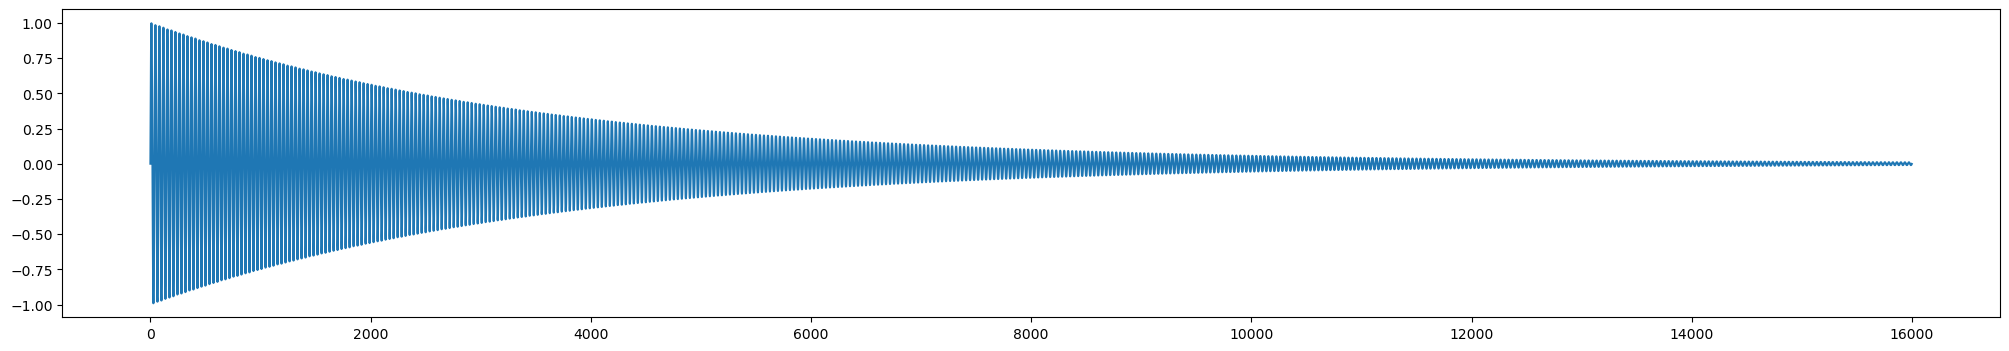

In [6]:
a4_x_decay, a4_y_decay = exponential_decay(sine_440hz_x, sine_440hz_y, rate=1e-2)

plt.figure(figsize=(25,4))
plt.plot(a4_x_decay, a4_y_decay)

ipd.Audio(a4_y_decay, rate=16_000)

In [ ]:
def overlay_waves(x1, y1, x2, y2, offset=0):
    assert len(x1) == len(x2), "len(x1) should equal len(x2)"
    composite_x = x1
    composite_y = []
    n_samples = len(x1)
    for i in range(n_samples):
        pass
    return composite_x, composite_y

In [7]:
def generate_pitch_with_overtones(x, y, amp, freq, n_overtones):
    n_samples = len(x)
    _, composite_pitch = generate_sine_wave(freq, amp, n_samples)
    for i in range(2, n_overtones + 1):
        overtone_frequency = freq * i
        overtone_strength = 1 / i
        _, overtone_y = generate_sine_wave(overtone_frequency, amp * overtone_strength, n_samples)
        for n in range(n_samples):
            composite_pitch[n] += overtone_y[n]
    return x, composite_pitch

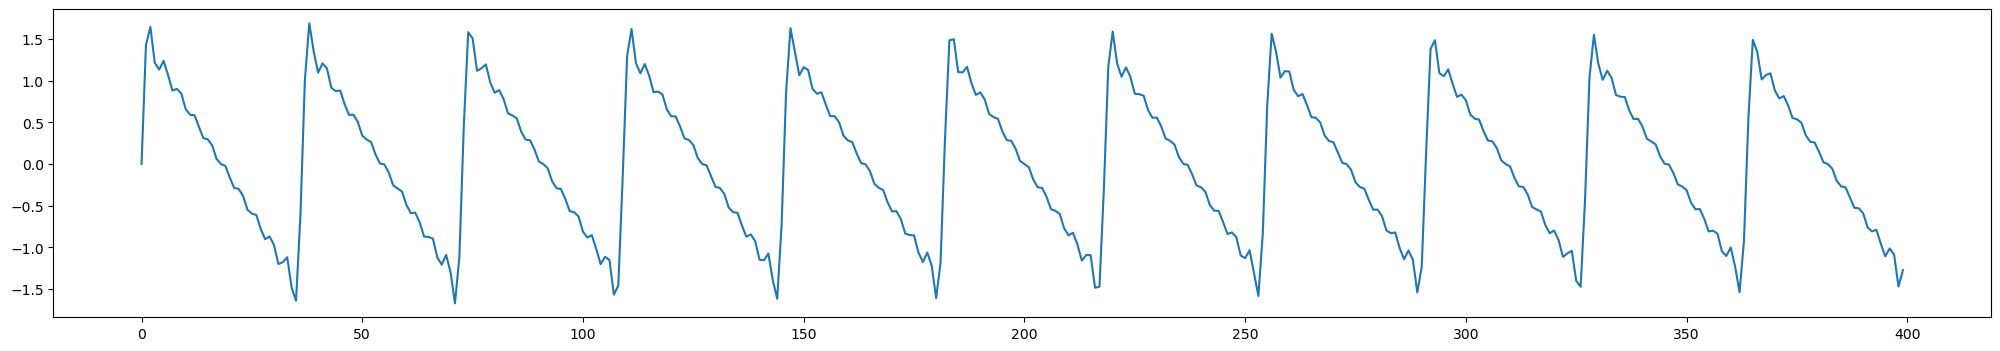

In [9]:
a4_x_overtones, a4_y_overtones = generate_pitch_with_overtones(sine_440hz_x, sine_440hz_y, 1, 440, 10)
a4_x_overtones, a4_y_overtones = exponential_decay(a4_x_overtones, a4_y_overtones, rate=1e-2)

plt.figure(figsize=(25,4))
plt.plot(a4_x_overtones[:400], a4_y_overtones[:400])

ipd.Audio(a4_y_overtones, rate=16_000)